# Analyze existing RCT datasets
Analyze existing RCT datasets using both frequentist and Bayesian approaches. 
The data I am using comes from Blatmann's RCT on war affected youth in Uganda which I downloaded from the dataverse.

In [1]:
import pandas as pd
import numpy as np
df =pd.read_stata("/Users/douglasjohnson/Documents/coding/datasets/yop_analysis.dta")

0.0    2170
1.0    1676
Name: treated, dtype: int64

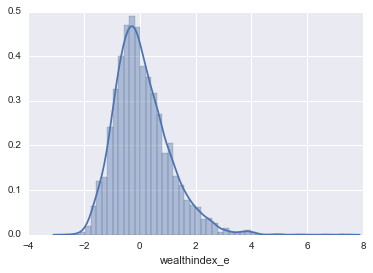

In [3]:
# inspect the data
%matplotlib inline
import seaborn as sns
df = df[-df.wealthindex_e.isnull()]
sns.distplot(df.wealthindex_e)
df.treated.value_counts()

In [4]:
# estimate the unadjusted impact on wealthindex_e
import statsmodels.api as sm
X = df.treated
X = sm.add_constant(X)
model = sm.OLS(df.wealthindex_e, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          wealthindex_e   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     19.75
Date:                Wed, 11 May 2016   Prob (F-statistic):           9.07e-06
Time:                        12:26:57   Log-Likelihood:                -5403.2
No. Observations:                3846   AIC:                         1.081e+04
Df Residuals:                    3844   BIC:                         1.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0154      0.021      0.725      0.4

In [5]:
# attempt to do basically the same analysis using a Bayesian approach and PyMC3
from pymc3 import Model, Normal, HalfNormal, NUTS, sample, find_MAP
from scipy import optimize
with Model() as basic_model:
    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta*df.treated

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=df.wealthindex_e)
    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)

    # draw 2000 posterior samples
    trace = sample(2000, start=start) 

Applied log-transform to sigma and added transformed sigma_log to model.
Assigned NUTS to alpha
Assigned NUTS to beta
Assigned NUTS to sigma_log
 [-----------------100%-----------------] 2000 of 2000 complete in 1.8 sec

In [12]:
dir(basic_model)

['Var',
 'Y_obs',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_random_variable',
 'alpha',
 'basic_RVs',
 'beta',
 'cont_vars',
 'contexts',
 'd2logp',
 'deterministics',
 'disc_vars',
 'dlogp',
 'fastd2logp',
 'fastdlogp',
 'fastfn',
 'fastlogp',
 'fn',
 'free_RVs',
 'get_context',
 'get_contexts',
 'logp',
 'logp_elemwise',
 'logpt',
 'makefn',
 'missing_values',
 'model',
 'named_vars',
 'observed_RVs',
 'potentials',
 'profile',
 'sigma_log',
 'test_point',
 'unobserved_RVs',
 'varlogpt',
 'vars',
 'verbose']

In [13]:
basic_model.deterministics

[sigma]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11de57cf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e1425c0>]], dtype=object)

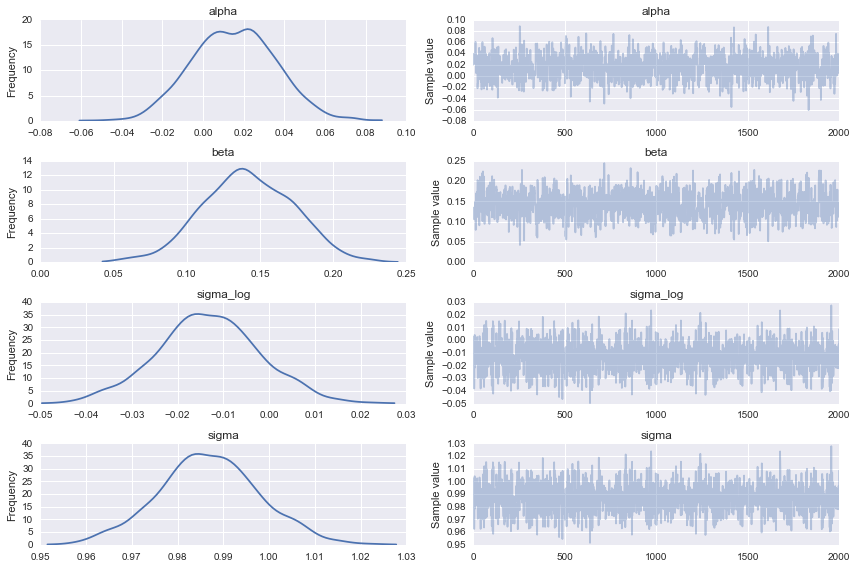

In [6]:
from pymc3 import traceplot
traceplot(trace)

In [ ]:
from pymc3 import summary
summary(trace)

In [ ]:
help("pymc3")